[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/srchd/machine-learning/blob/feature/image-classification-model/plane/visu.ipynb)

In [1]:
import os
import pickle
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout, Input, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.optimizers

# !wget -nc -P datasets/ http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/class_data.pkl
# !wget -nc -P datasets/ http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/class_label.pkl

CAT_NAMES = ['aeroplane', 'bird', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 'horse', 'sheep']

with open('datasets/class_data.pkl', 'rb') as f:
    xs = pickle.load(f)

with open('datasets/class_label.pkl', 'rb') as f:
    ys = pickle.load(f)

print(f'Shape of classification image array: {xs.shape}')
print(f'Shape of classification label array: {ys.shape}')

Shape of classification image array: (6638, 128, 128, 3)
Shape of classification label array: (6638, 10)


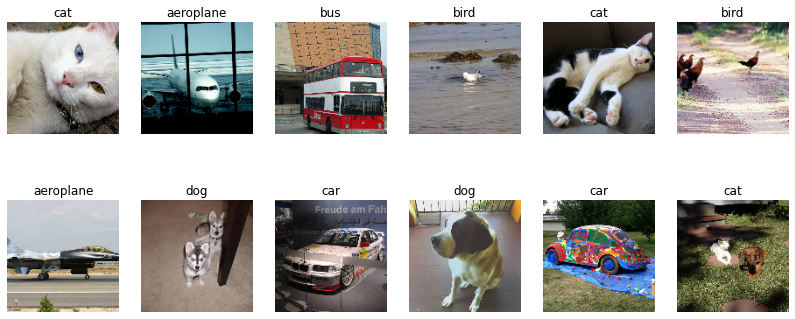

In [2]:
sample_idxs = np.random.choice(xs.shape[0], size=12)

fig, axs = plt.subplots(2,6)
fig.set_figwidth(14)
fig.set_figheight(6)

for plot_idx in range(12):
    axs[plot_idx//6, plot_idx%6].imshow(xs[sample_idxs[plot_idx]])
    text = CAT_NAMES[np.argmax(ys[sample_idxs[plot_idx]])]
    axs[plot_idx//6, plot_idx%6].axis("off")
    axs[plot_idx//6, plot_idx%6].set_title(str(text))

In [6]:
ys = np.argmax(ys, axis=1)
print(ys[:100])
perm = np.random.permutation(xs.shape[0])
xs = xs[perm]
ys = ys[perm]
print(ys[:100])

# Normalize between 0 and 1

xs = xs.astype(np.float32)
xs /= 255

# Divide xs and ys (70 / 15 / 15)

x_train, x_val, = np.split(xs, [int(.75 * len(xs))])
y_train, y_val, = np.split(ys, [int(.75 * len(ys))])

print(f'Training set shapes: {x_train.shape}, {y_train.shape}')
print(f'Validation set shapes: {x_val.shape}, {y_val.shape}')
# print(f'Test set shapes: {x_test.shape}, {y_test.shape}')

[2 8 6 7 0 7 4 4 3 0 2 0 4 4 7 1 5 7 5 5 0 7 6 4 3 8 7 7 2 9 4 1 5 1 7 1 4
 4 5 5 5 8 2 1 1 3 4 1 7 2 8 8 4 0 7 4 4 4 8 5 5 7 4 4 4 2 1 4 2 5 0 4 4 8
 5 4 5 2 4 3 7 0 3 4 9 4 4 2 7 7 7 4 0 4 5 3 1 7 6 7]
[1 1 7 5 5 6 3 7 8 7 0 4 4 8 1 0 7 1 0 1 7 5 5 3 5 7 8 8 0 6 8 7 5 3 9 0 8
 1 1 8 9 2 6 5 6 7 7 4 2 7 5 7 7 9 8 4 1 4 1 6 6 8 9 0 9 7 2 1 3 5 6 2 2 8
 4 7 6 6 7 4 0 5 8 0 0 6 0 0 4 0 5 5 7 5 7 0 5 8 5 4]
Training set shapes: (4646, 128, 128, 3), (4646,)
Validation set shapes: (996, 128, 128, 3), (996,)
Test set shapes: (996, 128, 128, 3), (996,)


In [32]:
cl_model = Sequential()
cl_model.add(Conv2D(128, (3,3), input_shape=(128, 128, 3), activation='relu', padding='same'))
cl_model.add(Dropout(0.4))
cl_model.add(AveragePooling2D((2,2))) # 64x64x20
cl_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cl_model.add(Dropout(0.4))
cl_model.add(AveragePooling2D((2,2))) # 32x32x40
cl_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cl_model.add(AveragePooling2D((2,2))) # 16x16x40
cl_model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
cl_model.add(Dropout(0.4))
cl_model.add(AveragePooling2D((2,2))) # 8x8x40
cl_model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
cl_model.add(Dropout(0.4))
cl_model.add(Flatten())
cl_model.add(Dense(16, activation='relu'))
cl_model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

cl_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
datagen_params = {
    'rotation_range' : 30,
    'horizontal_flip': True,
    'vertical_flip': True,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'fill_mode' : 'wrap',
    'zoom_range' : 0.25,
    'shear_range' : 0.2
}

datagen = ImageDataGenerator(**datagen_params)

train_generator = datagen.flow(x_train, y_train, batch_size=64)
val_generator = datagen.flow(x_val, y_val, batch_size=64)

In [33]:
model_checkpoint_folder = './checkpoints'
LOAD_MODEL_FROM_CHECKPOINT = True
checkpoint_name_to_load = ''
# asd

if LOAD_MODEL_FROM_CHECKPOINT and os.path.isdir(model_checkpoint_folder):
    
    checkpoint_path = os.path.join(model_checkpoint_folder, checkpoint_name_to_load)
    cl_model.load_weights(checkpoint_path)
    print("Model loaded from checkpoint:", checkpoint_path)
    
else:
    print("Checkpoint folder was not found. Training classifier...")

    model_chkpt = ModelCheckpoint(os.path.join(model_checkpoint_folder, 'cp-{epoch:04d}.ckpt'), verbose=1,\
                                  save_weights_only=True, save_freq=400)
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',\
                                         patience=10, restore_best_weights=True)
    
    history = cl_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                                            epochs=200, verbose=1,
                                            callbacks=[model_chkpt])


    tr_losses = history.history['loss']
    val_losses = history.history['val_loss']

    tr_accs = history.history['accuracy']
    val_accs = history.history['val_accuracy']

    plt.clf()
    plt.plot(tr_losses, label="J_train")
    plt.plot(val_losses, label="J_val")
    y_lim_top = np.maximum(np.amax(val_losses[2:]), np.amax(tr_losses[2:]))*1.5
    plt.ylim((0, y_lim_top))
    plt.xlabel("Number of epochs")
    plt.ylabel("Cost (J)")
    plt.legend()
    plt.savefig('images/losses.png')
    plt.show();

    plt.clf()
    plt.plot(tr_accs, label="acc_train")
    plt.plot(val_accs, label="acc_val")
    plt.ylim((0.4, 1.))
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig('images/accuracy.png')
    plt.show();
    

test_ce, test_acc = cl_model.evaluate(x_val, y_val, verbose=0)

print("Loss & accuracy on test set:", test_ce, test_acc)

Checkpoint folder was not found. Training classifier...
Epoch 1/200
 1/73 [..............................] - ETA: 17:19 - loss: 2.3122 - accuracy: 0.1094

KeyboardInterrupt: 